In [2]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import shapiro
from scipy.stats import normaltest


/var/folders/c2/l58_pxzx2tqb1lr7wlj_xt7h0000gn/T/ipykernel_63165/3767571084.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [22]:
df = pd.read_csv("dataset_mood_smartphone.csv")
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [27]:
df['time'] = pd.to_datetime(df['time']) #convert string to datetime

pivoted_df = df.pivot_table(index=['id', 'time'], columns='variable', 
                            values='value').reset_index() # each unique attribute becomes a column

averaged_df = pivoted_df.groupby(['id', pivoted_df['time'].dt.date]).mean() # average all values taken on the same day
averaged_df = averaged_df.drop('time', axis=1)
averaged_df

variable            activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-17       NaN             NaN                   NaN   
        2014-02-18       NaN             NaN                   NaN   
        2014-02-19       NaN             NaN                   NaN   
        2014-02-20       NaN             NaN                   NaN   
        2014-02-21       NaN             NaN                   NaN   
...                      ...             ...                   ...   
AS14.33 2014-05-27  0.012704        8.545776             59.382943   
        2014-05-28  0.103301        9.590398             37.238750   
        2014-05-29  0.169354        6.452161             54.388125   
        2014-05-30  0.192901       14.776845             46.412278   
        2014-05-31       NaN             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-05-27             62.347000             NaN          NaN   
        2014-05-28             43.907571             NaN          NaN   
        2014-05-29             68.369000             NaN          NaN   
        2014-05-30             37.174286             NaN          NaN   
        2014-05-31                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-05-27            NaN     17.835750      50.259100            NaN   
        2014-05-28      44.738625     27.891895      99.281685            NaN   
        2014-05-29            NaN      9.734000     198.880222       0.939000   
        2014-05-30            NaN     10.522000      75.390690      37.594571   
        2014-05-31            NaN           NaN            NaN            NaN   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
id      time                                                                 
AS14.01 2014-02-17             NaN               NaN             NaN   1.0   
        2014-02-18             NaN               NaN             NaN   1.0   
        2014-02-19             NaN               NaN             NaN   1.0   
        2014-02-20             NaN               NaN             NaN   1.0   
        2014-02-21             NaN               NaN             NaN   NaN   
...                            ...               ...             ...   ...   
AS14.33 2014-05-27             NaN         18.724333             NaN   1.0   
        2014-05-28             NaN          5.111000             NaN   1.0   
        2014-05-29             NaN          1.599500             NaN   1.0   
        2014-05-30        2.690667         15.521667             NaN   1.0   
        2014-05-31             NaN               NaN             NaN   NaN   

variable            circumplex.arousal  circumplex.valence  mood      

In [32]:
df_reset = averaged_df.reset_index()
heatmap_df = df_reset.pivot(index='time', columns='id', values='mood')
heatmap_df

id,AS14.01,AS14.02,AS14.03,AS14.05,AS14.06,AS14.07,AS14.08,AS14.09,AS14.12,AS14.13,...,AS14.24,AS14.25,AS14.26,AS14.27,AS14.28,AS14.29,AS14.30,AS14.31,AS14.32,AS14.33
time,,,,,,,,,,,,,,,,,,,,,
2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
"""
unique_dates = sorted(averaged_df['time'].dt.date.unique())
date_to_day_map = {date: idx for idx, date in enumerate(unique_dates)}
averaged_df['day'] = averaged_df['time'].map(date_to_day_map)
dataframes = {id_: grouped for id_, grouped in averaged_df.groupby(level=0)} # separate DataFrames for each 'id
as14_01_df = dataframes.get('AS14.01')
as14_01_df
"""

"\nunique_dates = sorted(averaged_df['time'].dt.date.unique())\ndate_to_day_map = {date: idx for idx, date in enumerate(unique_dates)}\naveraged_df['day'] = averaged_df['time'].map(date_to_day_map)\ndataframes = {id_: grouped for id_, grouped in averaged_df.groupby(level=0)} # separate DataFrames for each 'id\nas14_01_df = dataframes.get('AS14.01')\nas14_01_df\n"

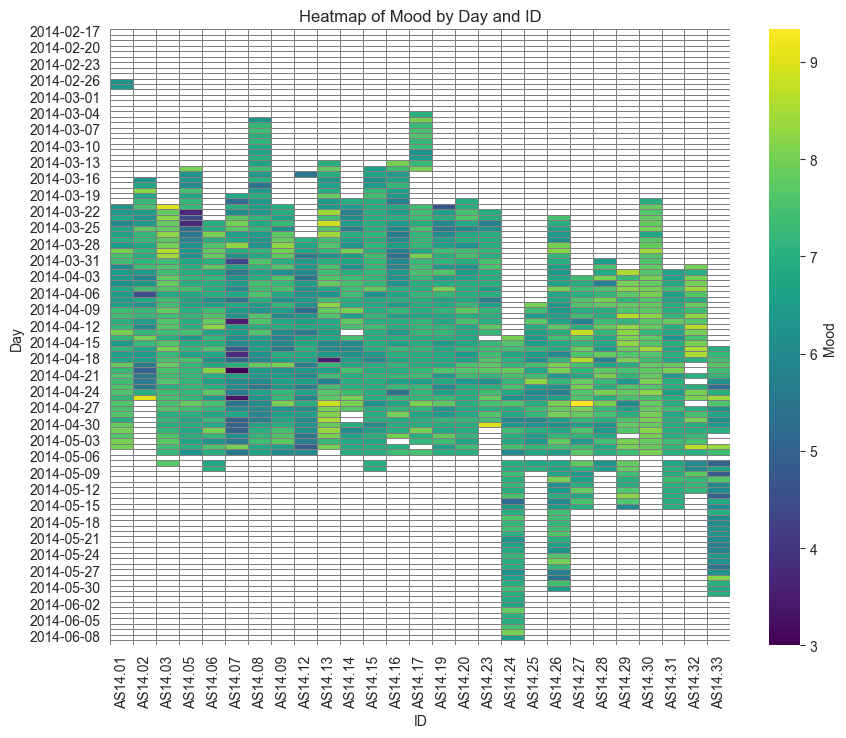

In [35]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color to white for NaN values
sns.set_style("white")

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
ax = sns.heatmap(heatmap_df, cmap="viridis", linewidths=.5, linecolor='gray', cbar_kws={'label': 'Mood'})

# Set the colors for NaN values to white
ax.set_facecolor('white')

plt.title('Heatmap of Mood by Day and ID')
plt.xlabel('ID')
plt.ylabel('Day')
plt.show()

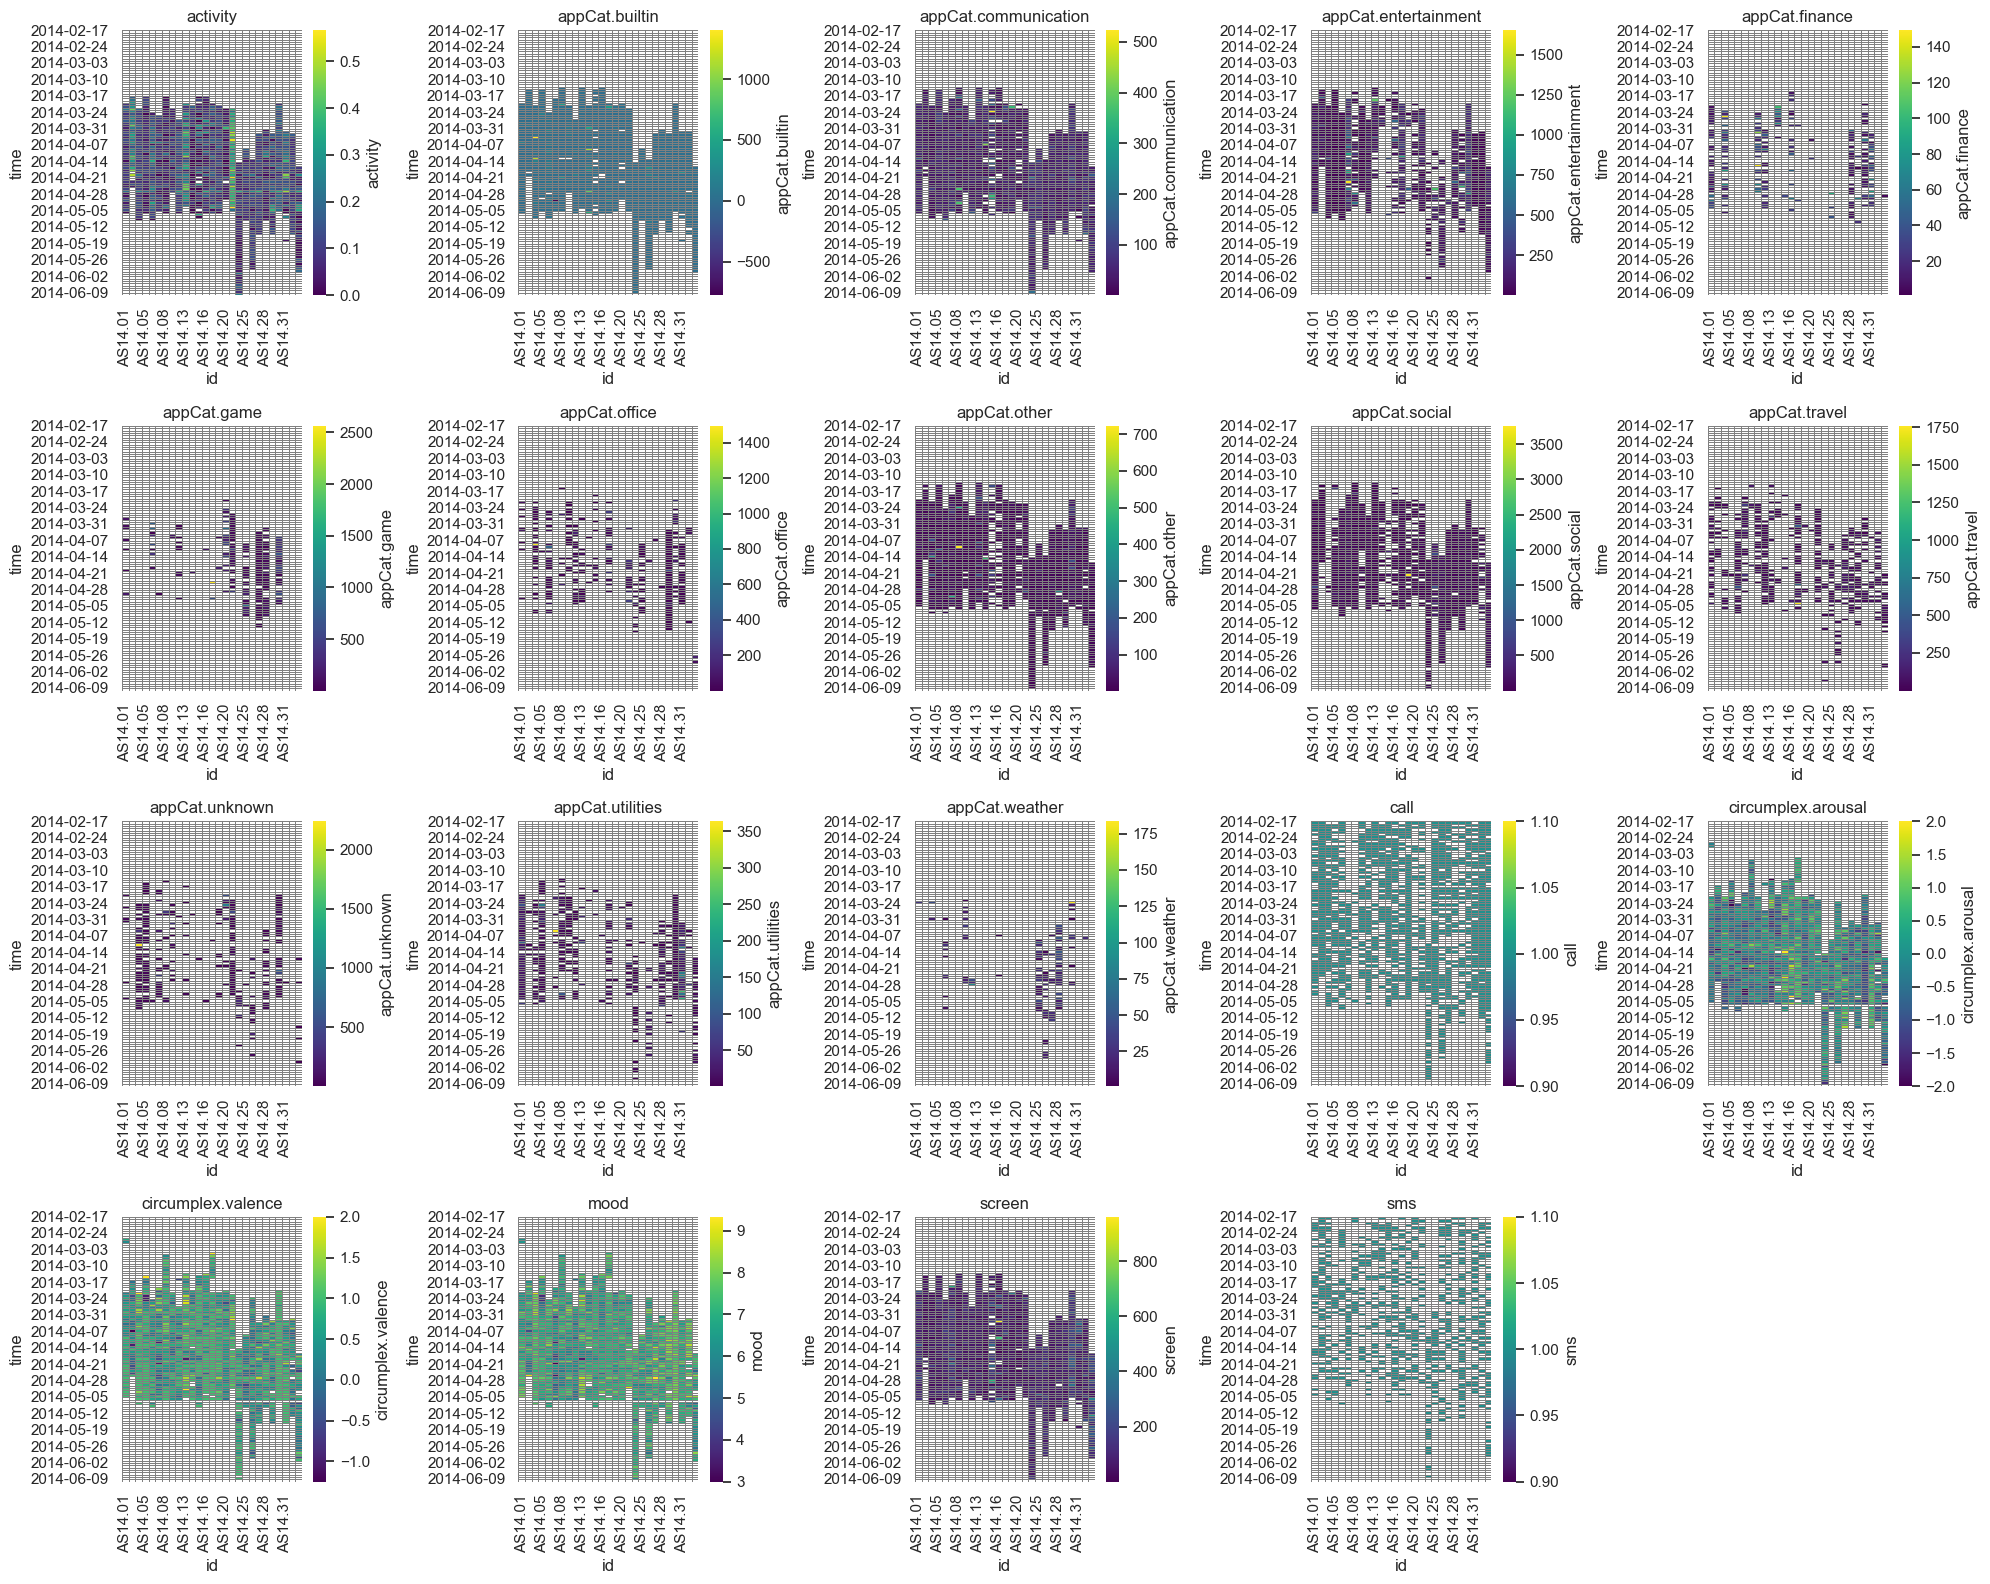

In [36]:
# Set seaborn style for the plots
sns.set(style="white")

# List all variable names except 'id' and 'time' which are not to be plotted
variables = [col for col in df_reset.columns if col not in ['id', 'time']]

# Prepare for plotting
num_variables = len(variables)
num_rows = -(-num_variables // 5)  # Ceiling division to calculate the number of rows needed
fig, axs = plt.subplots(num_rows, 5, figsize=(20, num_rows * 4))  # Adjust figsize as needed

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, var in enumerate(variables):
    # Pivot the table for the current variable
    heatmap_df = df_reset.pivot(index='time', columns='id', values=var)
    
    # Plot the heatmap
    sns.heatmap(heatmap_df, ax=axs[i], cmap="viridis", cbar_kws={'label': var}, linewidths=.5, linecolor='gray')
    axs[i].set_title(var)
    axs[i].set_facecolor('white')  # Set the background color for NaN values to white

# Hide any unused subplots that might exist if the number of variables is not a multiple of 5
for j in range(i + 1, num_rows * 5):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [27]:
counts = df.groupby(['id', 'variable']).size().unstack()
counts

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
id,,,,,,,,,,,,,,,,,,,
AS14.01,1056.0,6299.0,5337.0,609.0,275.0,12.0,23.0,327.0,1097.0,135.0,14.0,518.0,1.0,151.0,223.0,223.0,222.0,5438.0,39.0
AS14.02,687.0,4075.0,2449.0,418.0,NaN,NaN,NaN,213.0,561.0,303.0,NaN,28.0,NaN,451.0,159.0,159.0,159.0,4838.0,81.0
AS14.03,1122.0,903.0,2848.0,3387.0,72.0,NaN,102.0,494.0,18.0,51.0,46.0,31.0,3.0,223.0,222.0,222.0,221.0,4401.0,59.0
AS14.05,1169.0,1031.0,3800.0,3319.0,NaN,NaN,1.0,469.0,358.0,1.0,207.0,144.0,NaN,103.0,241.0,241.0,241.0,4380.0,40.0
AS14.06,772.0,558.0,3300.0,7171.0,NaN,15.0,74.0,255.0,1220.0,131.0,2.0,NaN,12.0,133.0,203.0,203.0,203.0,3738.0,102.0
AS14.07,952.0,3753.0,5050.0,258.0,NaN,1.0,NaN,260.0,482.0,81.0,65.0,9.0,NaN,116.0,192.0,192.0,192.0,4343.0,99.0
AS14.08,1159.0,633.0,1689.0,78.0,NaN,NaN,6.0,388.0,1058.0,26.0,25.0,58.0,NaN,10.0,299.0,299.0,299.0,1770.0,105.0
AS14.09,659.0,368.0,1783.0,4380.0,46.0,2.0,24.0,148.0,103.0,180.0,42.0,60.0,17.0,134.0,197.0,197.0,197.0,2311.0,38.0
AS14.12,932.0,7233.0,1188.0,604.0,99.0,18.0,74.0,201.0,1528.0,402.0,9.0,48.0,3.0,159.0,185.0,185.0,185.0,4220.0,38.0


In [4]:
# Pivot the table so that each variable becomes a column
pivoted_df = df.pivot_table(index=['id', 'time'], columns='variable', values='value')
pivoted_df

variable                         activity  appCat.builtin  \
id      time                                                
AS14.01 2014-02-17 12:04:42.394       NaN             NaN   
        2014-02-17 18:28:25.520       NaN             NaN   
        2014-02-18 09:29:51.257       NaN             NaN   
        2014-02-19 14:43:30.575       NaN             NaN   
        2014-02-19 17:29:10.378       NaN             NaN   
...                                   ...             ...   
AS14.33 2014-05-30 22:32:05.016       NaN             NaN   
        2014-05-30 22:32:11.049       NaN           3.122   
        2014-05-30 22:32:14.240       NaN           1.003   
        2014-05-30 22:32:15.246       NaN           4.134   
        2014-05-31 12:00:00.000       NaN             NaN   

variable                         appCat.communication  appCat.entertainment  \
id      time                                                                  
AS14.01 2014-02-17 12:04:42.394                   NaN                   NaN   
        2014-02-17 18:28:25.520                   NaN                   NaN   
        2014-02-18 09:29:51.257                   NaN                   NaN   
        2014-02-19 14:43:30.575                   NaN                   NaN   
        2014-02-19 17:29:10.378                   NaN                   NaN   
...                                               ...                   ...   
AS14.33 2014-05-30 22:32:05.016                   NaN                   NaN   
        2014-05-30 22:32:11.049                   NaN                   NaN   
        2014-05-30 22:32:14.240                   NaN                   NaN   
        2014-05-30 22:32:15.246                   NaN                   NaN   
        2014-05-31 12:00:00.000                   NaN                   NaN   

variable                         appCat.finance  appCat.game  appCat.office  \
id      time                                                                  
AS14.01 2014-02-17 12:04:42.394             NaN          NaN            NaN   
        2014-02-17 18:28:25.520             NaN          NaN            NaN   
        2014-02-18 09:29:51.257             NaN          NaN            NaN   
        2014-02-19 14:43:30.575             NaN          NaN            NaN   
        2014-02-19 17:29:10.378             NaN          NaN            NaN   
...                                         ...          ...            ...   
AS14.33 2014-05-30 22:32:05.016             NaN          NaN            NaN   
        2014-05-30 22:32:11.049             NaN          NaN            NaN   
        2014-05-30 22:32:14.240             NaN          NaN            NaN   
        2014-05-30 22:32:15.246             NaN          NaN            NaN   
        2014-05-31 12:00:00.000             NaN          NaN            NaN   

variable                         appCat.other  appCat.social  appCat.travel  \
id      time                                                                  
AS14.01 2014-02-17 12:04:42.394           NaN            NaN            NaN   
        2014-02-17 18:28:25.520           NaN            NaN            NaN   
        2014-02-18 09:29:51.257           NaN            NaN            NaN   
        2014-02-19 14:43:30.575           NaN            NaN            NaN   
        2014-02-19 17:29:10.378           NaN            NaN            NaN   
...                                       ...            ...            ...   
AS14.33 2014-05-30 22:32:05.016           NaN            NaN            NaN   
        2014-05-30 22:32:11.049           NaN            NaN            NaN   
        2014-05-30 22:32:14.240           NaN            NaN            NaN   
        2014-05-30 22:32:15.246           NaN            NaN            NaN   
        2014-05-31 12:00:00.000           NaN            NaN            NaN   

variable                         appCat.unknown  appCat.utilities  \
id      time                                         

In [17]:
# Step 1: Get the time stamps where both mood and the variable have an entry
mood_df = df[df['variable'] == 'mood']
variable_df = df[df['variable'] != 'mood']

common_entries = pd.merge(mood_df, variable_df, on=['id', 'time'])
common_entries

# Step 2: Print the counts for every unique variable
variable_counts = common_entries['variable_y'].value_counts()
print("Counts for every unique variable:")
print(variable_counts)

# Step 3: Calculate Pearson correlation between mood values and unique variable values
unique_variables = common_entries['variable_y'].unique()
correlations = {}

for variable in unique_variables:
    subset = common_entries[common_entries['variable_y'] == variable]
    correlation = subset['value_x'].corr(subset['value_y'])
    correlations[variable] = correlation

print("\nPearson correlation between mood value and unique variable value:")
print(correlations)

# Step 4: Perform a t-test for each unique variable
t_test_results = {}

for variable in unique_variables:
    subset = common_entries[common_entries['variable_y'] == variable]
    if len(subset['value_x'].unique()) == 1 or len(subset['value_y'].unique()) == 1:
        print(f"Skipping variable {variable} because one of the subsets has only one unique value.")
        continue
    
    t_statistic, p_value = ttest_ind(subset['value_x'], subset['value_y'])
    t_test_results[variable] = {'t_statistic': t_statistic, 'p_value': p_value}

print("\nT-test results for the effect of each variable on mood:")
for variable, result in t_test_results.items():
    print(f"Variable: {variable}, t-statistic: {result['t_statistic']}, p-value: {result['p_value']}")



Counts for every unique variable:
variable_y
circumplex.arousal    5666
circumplex.valence    5666
activity              4534
Name: count, dtype: int64

Pearson correlation between mood value and unique variable value:
{'circumplex.arousal': 0.14671288600902202, 'circumplex.valence': 0.6990995106864647, 'activity': 0.09709941554176431}

T-test results for the effect of each variable on mood:
Variable: circumplex.arousal, t-statistic: nan, p-value: nan
Variable: circumplex.valence, t-statistic: nan, p-value: nan
Variable: activity, t-statistic: 423.73891957353226, p-value: 0.0


In [33]:
summary_list = []
df['time'] = pd.to_datetime(df['time'])

for attribute in df['variable'].unique():
    attribute_data = df[df['variable'] == attribute]['value']
    if attribute_data.dtype == 'float64' or attribute_data.dtype == 'int64':
        # Perform Shapiro-Wilk test for normality
        stat, p_value = shapiro(attribute_data)
        is_normal = 'Yes' if p_value > 0.05 else 'No'
    else:
        # Cannot perform Shapiro-Wilk on non-numeric data
        stat, p_value, is_normal = np.nan, np.nan, 'N/A'

    data_range = (attribute_data.min(), attribute_data.max())
    distribution = attribute_data.describe().to_dict()
    
    summary_list.append({
        'Attribute': attribute,
        'Data Type': attribute_data.dtype,
        'Range': data_range,
        'Distribution': distribution,
        'Normal Distribution?': is_normal,
        'P-Value': p_value
    })

summary_table = pd.DataFrame(summary_list)
summary_table


/var/folders/c2/l58_pxzx2tqb1lr7wlj_xt7h0000gn/T/ipykernel_54929/333257314.py:8: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5641.
  stat, p_value = shapiro(attribute_data)
/var/folders/c2/l58_pxzx2tqb1lr7wlj_xt7h0000gn/T/ipykernel_54929/333257314.py:8: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5643.
  stat, p_value = shapiro(attribute_data)
/var/folders/c2/l58_pxzx2tqb1lr7wlj_xt7h0000gn/T/ipykernel_54929/333257314.py:8: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5643.
  stat, p_value = shapiro(attribute_data)
/var/folders/c2/l58_pxzx2tqb1lr7wlj_xt7h0000gn/T/ipykernel_54929/333257314.py:8: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22965.
  stat, p_value = shapiro(attribute_data)
/var/folders/c2/l58_pxzx2tqb1lr7wlj_xt7h0000gn/T/ipykernel_54929/333257314.py:8: UserWa

,Attribute,Data Type,Range,Distribution,Normal Distribution?,P-Value
0,mood,float64,"(1.0, 10.0)","{'count': 5641.0, 'mean': 6.9925545116114165, ...",No,1.412244e-54
1,circumplex.arousal,float64,"(-2.0, 2.0)","{'count': 5597.0, 'mean': -0.09862426299803466...",Yes,1.000000e+00
2,circumplex.valence,float64,"(-2.0, 2.0)","{'count': 5487.0, 'mean': 0.6878075451066157, ...",Yes,1.000000e+00
3,activity,float64,"(0.0, 1.0)","{'count': 22965.0, 'mean': 0.11595847104183996...",No,5.150750e-108
4,screen,float64,"(0.0350000858306885, 9867.00699996948)","{'count': 96578.0, 'mean': 75.33520557472382, ...",No,4.037047e-174
5,call,float64,"(1.0, 1.0)","{'count': 5239.0, 'mean': 1.0, 'std': 0.0, 'mi...",Yes,1.000000e+00
6,sms,float64,"(1.0, 1.0)","{'count': 1798.0, 'mean': 1.0, 'std': 0.0, 'mi...",Yes,1.000000e+00
7,appCat.builtin,float64,"(-82798.871, 33960.246)","{'count': 91288.0, 'mean': 18.5382618854614, '...",No,2.447906e-181
8,appCat.communication,float64,"(0.006, 9830.777)","{'count': 74276.0, 'mean': 43.34379214012602, ...",No,5.881671e-167
9,appCat.entertainment,float64,"(-0.011, 32148.677)","{'count': 27125.0, 'mean': 37.576480258064514,...",No,1.644765e-142


In [37]:
# Function to remove outliers based on the IQR method for each variable
def remove_outliers_with_report(df, variable_col='variable', value_col='value'):
    report = {}
    result_df = pd.DataFrame()
    
    for variable in df[variable_col].unique():
        if variable == 'mood':
            result_df = pd.concat([result_df, df[df[variable_col] == variable]], ignore_index=True)
            continue
        temp_df = df[df[variable_col] == variable]
        initial_count = temp_df.shape[0]
        
        Q1 = temp_df[value_col].quantile(0.25)
        Q3 = temp_df[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        
        filtered_df = temp_df[(temp_df[value_col] >= lower_bound) & (temp_df[value_col] <= upper_bound)]
        final_count = filtered_df.shape[0]
        
        # Store the results in the report
        report[variable] = {
            'initial_count': initial_count,
            'final_count': final_count,
            'removed': initial_count - final_count
        }
        
        result_df = pd.concat([result_df, filtered_df], ignore_index=True)
    
    return result_df, report

cleaned_df, removal_report = remove_outliers_with_report(df)
cleaned_df

# Display removal report
for variable, counts in removal_report.items():
    print(f"{variable}: Initial = {counts['initial_count']}, Final = {counts['final_count']}, Removed = {counts['removed']}")

# 376912 rows to 338589 - 40k rows removed

circumplex.arousal: Initial = 5643, Final = 5597, Removed = 46
circumplex.valence: Initial = 5643, Final = 5487, Removed = 156
activity: Initial = 22965, Final = 21377, Removed = 1588
screen: Initial = 96578, Final = 88355, Removed = 8223
call: Initial = 5239, Final = 5239, Removed = 0
sms: Initial = 1798, Final = 1798, Removed = 0
appCat.builtin: Initial = 91288, Final = 82454, Removed = 8834
appCat.communication: Initial = 74276, Final = 69392, Removed = 4884
appCat.entertainment: Initial = 27125, Final = 22917, Removed = 4208
appCat.finance: Initial = 939, Final = 842, Removed = 97
appCat.game: Initial = 813, Final = 740, Removed = 73
appCat.office: Initial = 5642, Final = 4887, Removed = 755
appCat.other: Initial = 7650, Final = 6787, Removed = 863
appCat.social: Initial = 19145, Final = 17716, Removed = 1429
appCat.travel: Initial = 2846, Final = 2717, Removed = 129
appCat.unknown: Initial = 939, Final = 875, Removed = 64
appCat.utilities: Initial = 2487, Final = 2342, Removed = 1